# Lipkin Model
#### Kris McBrian
***
Hamiltonian in Quasispin Formalism      
$H = \epsilon J_z - \frac{1}{2} V(J^2_+ + J_-^2) $

In [3]:
import numpy  as np
import matplotlib.pyplot as plt
import qiskit as qk
from qiskit.visualization import plot_histogram


backend = qk.Aer.get_backend('qasm_simulator')

In [16]:
# circuit parameters
n_angles = 100   # number of angles to evaluate exp. value
n_shots = 2**13 # number of measurements of quantum circuit

# system parameters
e = 1 # epsilon
V = 1 # potential

In [37]:
# Hamiltonian
def H(e, V, Jz, JpJm):
    return e*Jz - 0.5*V*JpJm

# evaluate expectation value from results of circuits
def exp_value(eig_val, results, n_shots):
    avg = 0.
    # for every result that was measured
    for a in results.keys():
        # obtain index by converting binary measurement to integer
        b = int(a,2)    # e.g. '10' eigenvalue stored at index 2 of eig
        # weighted sum of eigenvalues and number of measurments
        avg += eig_val[b]*results[a]
    return avg / n_shots

#### $J_z$ Functions

In [38]:
def Jz_circuit(theta, n_shots):
    qc = qk.QuantumCircuit(1,1)
    
    qc.ry(2*theta, 0)
    
    qc.measure(0,0)
    
    exp_values = qk.execute(qc, backend, shots=n_shots)
    results = exp_values.result().get_counts()
    return 0.5*exp_value([1.,-1.], results, n_shots)

def Jz_expvalue(theta):
    return 0.5*np.cos(2*theta)

#### $J_+^2 + J_-^2$ Functions

In [39]:
def JpJm_circuit(theta, n_shots):
    qc = qk.QuantumCircuit(2,2)
    
    qc.ry(2*theta, 0)
    qc.ry(2*theta, 1)

    qc.cx(0,1)
    qc.h(0)    
    
    qc.measure(0,0)
    qc.measure(1,1)
    
    exp_val = qk.execute(qc, backend, shots=n_shots)
    results = exp_val.result().get_counts()
    return exp_value([1.,-1.,0,0], results, n_shots)

def JpJm_expvalue(theta):
    return 0.5*(np.sin(2*theta))**2

#### Evaluate Circuits and Exact Expectation Values

In [40]:
theta = np.linspace(0,np.pi,n_angles)
Jz_results = np.zeros(n_angles)
Jz_exact = np.zeros(n_angles)

JpJm_results = np.zeros(n_angles)
JpJm_exact = np.zeros(n_angles)

for i in range(n_angles):
    Jz_results[i] = Jz_circuit(theta[i],n_shots)
    Jz_exact[i] = Jz_expvalue(theta[i])
    
    JpJm_results[i] = JpJm_circuit(theta[i], n_shots)
    JpJm_exact[i] = JpJm_expvalue(theta[i])

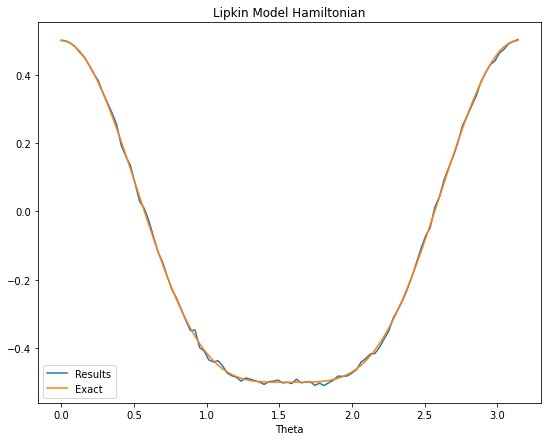

In [42]:
plt.figure(figsize = (9,7))
#plt.plot(theta,e*Jz_results - 0.5*V*JpJm_results,label='Results')
plt.plot(theta,H(e, V, Jz_results, JpJm_results),label='Results')
plt.plot(theta,H(e, V, Jz_exact, JpJm_exact),label='Exact')
plt.title("Lipkin Model Hamiltonian")
plt.xlabel("Theta")
plt.legend()
plt.show()